# Clustering With K Means - Python Tutorial

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Text(0, 0.5, 'Income($)')

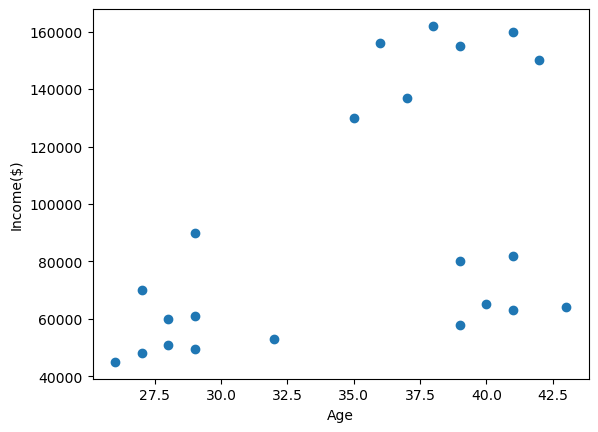

In [4]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [5]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\pakhrins\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pakhrins\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [6]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [7]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [8]:
km.cluster_centers_[:,0]

array([32.90909091, 38.28571429, 34.        ])

In [9]:
km.cluster_centers_[:,1]

array([ 56136.36363636, 150000.        ,  80500.        ])

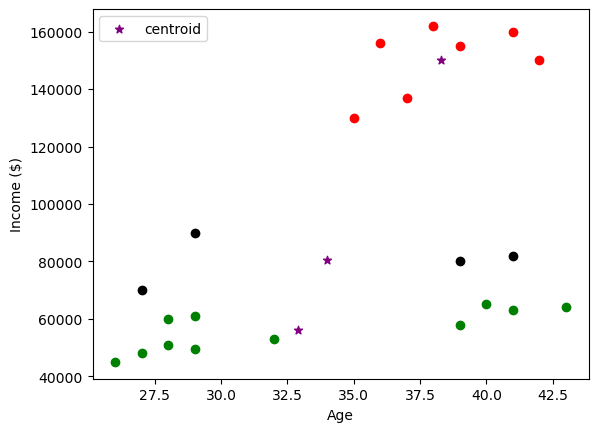

In [10]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

# Preprocessing using min max scaler

In [11]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [12]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


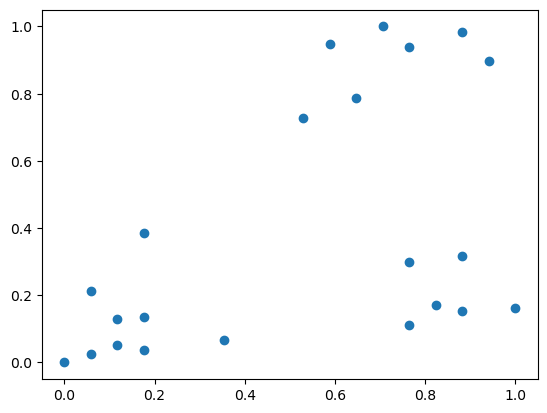

In [13]:
plt.scatter(df.Age,df['Income($)'])

In [14]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\pakhrins\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pakhrins\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [15]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [16]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

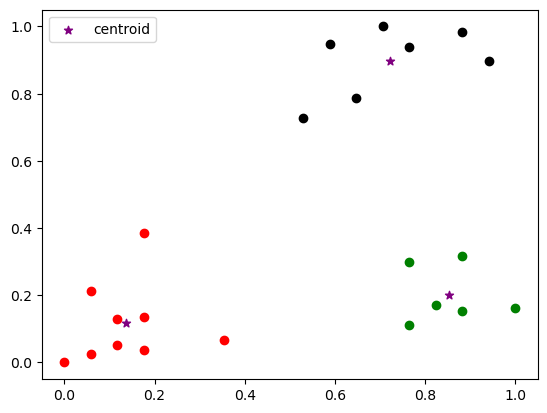

In [17]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

# Elbow Plot

In [18]:
import numpy as np
sse = []
k_rng = range(2,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    numpy_array = np.array(df[['Age','Income($)']])
    km.fit(numpy_array)
    sse.append(km.inertia_)

C:\Users\pakhrins\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pakhrins\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pakhrins\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pakhrins\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

In [19]:
sse

[2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.27612937677853544,
 0.22443334487241418,
 0.18883868819988073,
 0.14257076249690034,
 0.10663983840905437]

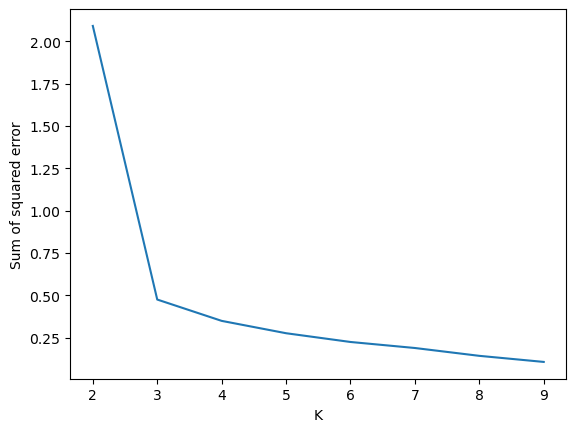

In [20]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# NLP Implementation

In [21]:
import pandas as pd
df = pd.read_csv("Movies_Dataset.csv")

In [22]:
df.head()

,id,title,overview
0,0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,1,Jumanji,When siblings Judy and Peter discover an encha...
2,2,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,4,Father of the Bride Part II,Just when George Banks has recovered from his ...


In [23]:
df

,id,title,overview
0,0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,1,Jumanji,When siblings Judy and Peter discover an encha...
2,2,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,4,Father of the Bride Part II,Just when George Banks has recovered from his ...
...,...,...,...
45461,45461,Subdue,Rising and falling between a man and woman.
45462,45462,Century of Birthing,An artist struggles to finish his work while a...
45463,45463,Betrayal,"When one of her hits goes wrong, a professiona..."
45464,45464,Satan Triumphant,"In a small town live two brothers, one a minis..."


**Explore the data**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        45466 non-null  int64 
 1   title     45460 non-null  object
 2   overview  44507 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


# Data pre-processing

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [28]:
documents = df['overview'].values.astype("U")

In [29]:
documents

array(["Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",
       "When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.",
       "A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorc̩e opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in

In [30]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

In [31]:
features

<45466x74567 sparse matrix of type '<class 'numpy.float64'>'
	with 1212061 stored elements in Compressed Sparse Row format>

In [32]:
k = 20
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(max_iter=100, n_clusters=20, n_init=1)

In [33]:
df

,id,title,overview
0,0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,1,Jumanji,When siblings Judy and Peter discover an encha...
2,2,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,4,Father of the Bride Part II,Just when George Banks has recovered from his ...
...,...,...,...
45461,45461,Subdue,Rising and falling between a man and woman.
45462,45462,Century of Birthing,An artist struggles to finish his work while a...
45463,45463,Betrayal,"When one of her hits goes wrong, a professiona..."
45464,45464,Satan Triumphant,"In a small town live two brothers, one a minis..."


In [34]:
df['cluster'] = model.labels_

In [35]:
df.head()

,id,title,overview,cluster
0,0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",11
1,1,Jumanji,When siblings Judy and Peter discover an encha...,11
2,2,Grumpier Old Men,A family wedding reignites the ancient feud be...,17
3,3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",12
4,4,Father of the Bride Part II,Just when George Banks has recovered from his ...,0


In [36]:
df19 = df[df.cluster==19]

In [37]:
df19

,id,title,overview,cluster
121,121,Chungking Express,"Every day, Cop 223 buys a can of pineapple wit...",19
144,144,The Basketball Diaries,Film adaptation of street tough Jim Carroll's ...,19
156,156,Clockers,Strike is a young city drug pusher under the t...,19
160,160,Desperado,A gunslinger is embroiled in a war with a loca...,19
223,223,Drop Zone,A team of skydiving crooks led by DEA-agent-tu...,19
...,...,...,...,...
44560,44560,Blood Freak,A biker comes upon a girl with a flat tire and...,19
44612,44612,Extraordinary Mission,���Extraordinary Mission�۪ is a new Chinese ac...,19
44776,44776,Orange Sunshine,The never-before-told story of the Brotherhood...,19
45071,45071,Sniper 3,Master Gunnery Sergeant Thomas Beckett is the ...,19


In [38]:
df12 = df[df.cluster==12]

In [39]:
df12

,id,title,overview,cluster
3,3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",12
23,23,Powder,Harassed by classmates who won't accept his sh...,12
35,35,Dead Man Walking,A justice drama based on a true story about a ...,12
42,42,Restoration,"An aspiring young physician, Robert Merivel fo...",12
57,57,The Postman,Simple Italian postman learns to love poetry w...,12
...,...,...,...,...
45326,45326,Love,"In Imperial Russia, Anna Karenina falls in lov...",12
45375,45375,Phillauri,A man is forced to marry a tree to ward off il...,12
45393,45393,The Sparrow's Fluttering,"A woman, who has been the mistress of a man wh...",12
45421,45421,Pickpocket,Little pocket thief Wu never got away from the...,12


# Output the results

In [40]:
# output the result to a text file.

clusters = df.groupby('cluster')    

for cluster in clusters.groups:
    print("\n\n**********************\n")
    
    print("Cluster No: "+str(cluster))
    
    print("\n**********************\n\n")

    
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['title','overview']] # get title and overview columns
    f.close()
    print(data)



**********************

Cluster No: 0

**********************


                             title  \
4      Father of the Bride Part II   
16           Sense and Sensibility   
51                Mighty Aphrodite   
113      Happiness Is in the Field   
123         Flirting with Disaster   
...                            ...   
45224                  Little Tony   
45253                         Quiz   
45321    The Structure of Crystals   
45382              The Twin Swords   
45420               Arabian Nights   

                                                overview  
4      Just when George Banks has recovered from his ...  
16     Rich Mr. Dashwood dies, leaving his second wif...  
51     When Lenny and his wife, Amanda, adopt a baby,...  
113    Francis, the boss of a small plumbing supply c...  
123    Adopted as a child, new father Mel Colpin (Ben...  
...                                                  ...  
45224  Brand, an unemployed illiterate in his fourtie...  
45253

In [41]:
clusters = df.groupby('cluster')    
clusters
for cluster in clusters.groups:
    print(cluster)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [42]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 wife
 husband
 man
 son
 daughter
 life
 home
 new
 ex
 young
------------
Cluster 1:
 town
 small
 new
 local
 sheriff
 young
 life
 man
 girl
 family
------------
Cluster 2:
 movie
 film
 story
 life
 star
 based
 director
 hollywood
 new
 tv
------------
Cluster 3:
 documentary
 film
 feature
 interviews
 world
 footage
 life
 filmmaker
 american
 length
------------
Cluster 4:
 people
 world
 story
 lives
 life
 young
 city
 film
 new
 man
------------
Cluster 5:
 earth
 planet
 space
 alien
 aliens
 crew
 human
 race
 world
 humans
------------
Cluster 6:
 film
 directed
 story
 director
 based
 life
 short
 feature
 time
 films
------------
Cluster 7:
 woman
 young
 husband
 man
 love
 life
 falls
 new
 finds
 married
------------
Cluster 8:
 group
 friends
 young
 people
 world
 students
 new
 soon
 island
 men
------------
Cluster 9:
 school
 high
 teacher
 students
 student
 girl
 new
 girls
 year
 friends
------------
Cluster 10:
 united
 stat

In [43]:
zz = model.cluster_centers_

In [44]:
zz

array([[0.        , 0.00111581, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00169059, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00114319, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00107037, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00030783, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00110053, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [45]:
zz.shape

(20, 74567)

In [46]:
for i in range(20):
    print(zz[i].shape)

(74567,)
(74567,)
(74567,)
(74567,)
(74567,)
(74567,)
(74567,)
(74567,)
(74567,)
(74567,)
(74567,)
(74567,)
(74567,)
(74567,)
(74567,)
(74567,)
(74567,)
(74567,)
(74567,)
(74567,)


In [47]:
model.cluster_centers_[0]

array([0.        , 0.00111581, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [48]:
sum(model.cluster_centers_[0])

4.848559579903451

In [49]:
import numpy as np  
# Create NumPy 1-D array
arr = np.array([6, 8, 3, 9, 5, 7])

# Get the argsort of 1-D array
arr1 = np.argsort(arr)
print(arr1)

[2 4 0 5 1 3]


In [50]:
len(model.cluster_centers_[0])

74567

In [51]:
model.cluster_centers_.argsort()

array([[    0, 47075, 47076, ..., 40600, 31154, 72613],
       [    0, 47535, 47536, ..., 45915, 61371, 67507],
       [    0, 48084, 48086, ..., 63545, 23649, 44445],
       ...,
       [    0, 46658, 46659, ..., 30402, 23084, 22864],
       [    0, 48698, 48699, ..., 17618, 59333, 35947],
       [    0, 48658, 48659, ..., 39341, 16547, 19649]], dtype=int64)

In [52]:
model.cluster_centers_.argsort()[:, ::-1]

array([[72613, 31154, 40600, ..., 47076, 47075,     0],
       [67507, 61371, 45915, ..., 47536, 47535,     0],
       [44445, 23649, 63545, ..., 48086, 48084,     0],
       ...,
       [22864, 23084, 30402, ..., 46659, 46658,     0],
       [35947, 59333, 17618, ..., 48699, 48698,     0],
       [19649, 16547, 39341, ..., 48659, 48658,     0]], dtype=int64)

In [53]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()


In [54]:
for j in order_centroids[6, :10]: #print out 10 feature terms of each cluster
    print(j)
    print (' %s' % terms[j])

23649
 film
18214
 directed
63545
 story
18224
 director
6449
 based
38580
 life
60234
 short
23216
 feature
66816
 time
23676
 films
